In [35]:
import os
import glob
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
ROOT_DIR = pathlib.Path().absolute()
DATASET_DIR = os.path.join(ROOT_DIR, 'data-science-bowl-2018')

In [68]:
split = 'stage1_train'
path_to_data = os.path.join(DATASET_DIR, split)
path_by_id_list = glob.glob(os.path.join(path_to_data, '*'))
#id_list = [f for f in os.listdir(path_to_data) if not f.startswith('.')]

image_list = []
mask_list = []

for path_id in path_by_id_list:
    images = glob.glob(path_id + '/images/*png')
    masks = glob.glob(path_id + '/masks/*png')
    image_list.extend(images)
    mask_list.append(masks)

print(image_list[0])
print(mask_list[0][0])



/Users/ondra/Dev/Personal/cnn-cells/data-science-bowl-2018/stage1_train/5cc036b65f7f2d5480e2be111a561f3713ac021683a9a9138dc49492a29ce856/images/5cc036b65f7f2d5480e2be111a561f3713ac021683a9a9138dc49492a29ce856.png
/Users/ondra/Dev/Personal/cnn-cells/data-science-bowl-2018/stage1_train/5cc036b65f7f2d5480e2be111a561f3713ac021683a9a9138dc49492a29ce856/masks/43f745dd0aa8e39966bcde5001ba490990bf6feab7e4eff2c8255e66b5da11f3.png


In [120]:
def mask_to_bbx(mask):
    rows = np.any(mask, axis=1)
    cols = np.any(mask, axis=0)
    ymin, ymax = np.where(rows)[0][[0, -1]]
    xmin, xmax = np.where(cols)[0][[0, -1]]
    return xmin, ymin, xmax, ymax

AxisError: axis 1 is out of bounds for array of dimension 1

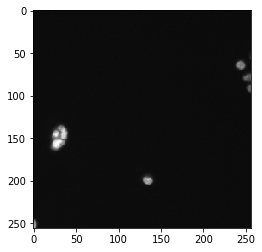

In [129]:
#im = np.array(Image.open(path_to_data+"/"+id_list[0]+"/images/"+id_list[0]+".png"), dtype=np.uint8)
#mask = np.array(Image.open(path_to_data+"/"+id_list[0]+"/masks/3fe73504a2c62edb0c78d65be223e6254b19e309b0f8e12a3e719db54cc21f80.png"), dtype=np.uint8)
id = 50
im = np.array(Image.open(image_list[id]))

fig, ax1 = plt.subplots(1)

ax1.imshow(im)

i = 0
for mask in mask_list[id]:
    mask = np.array(Image.open(mask))
    xmin, ymin, xmax, ymax = mask_to_bbx(mask[i])
    width = xmax-xmin
    height = ymax-ymin
    rect = Rectangle((xmin,ymin),width,height,linewidth=1,edgecolor='r',facecolor='none')
    ax1.add_patch(rect)
    i += 1


plt.show()

# Add the patch to the Axes
#ax[0]

#fig = plt.figure()
#fig.add_subplot(1, 2, 1)
#plt.imshow(im)
#fig.add_subplot(1, 2, 2)
#plt.imshow(mask)
#plt.show(block=True)



In [43]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

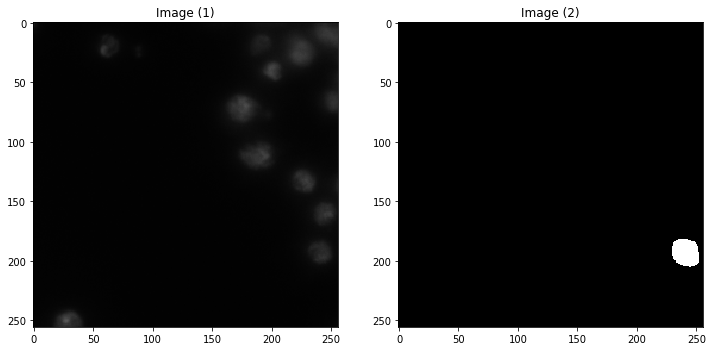

In [46]:
show_images([im,mask], cols=1)